In [11]:
import bs4  
import requests  
import pandas as pd
import matplotlib.pyplot as plt

#Creating the requests  
  
res = requests.get("https://worldpopulationreview.com/countries")  
print("The object type:",type(res))  
  
# Convert the request object to the Beautiful Soup Object  
soup = bs4.BeautifulSoup(res.text,'html.parser')  
print("The object type:",type(soup))

The object type: <class 'requests.models.Response'>
The object type: <class 'bs4.BeautifulSoup'>


In [12]:
#datatable-container undefined
values = []
# soup.select('.tr')  
for i in soup.select('td'):  
#     print(i.text,end = ',')  
#     print(i.text)
    values.append(i.text)
    # soup.select('tbody')
#     print(a)


In [13]:
rank = []
country = []
pop2022 = []
pop2021 = []
gr = []
ar = []
den = []
data = []
for i in range(0, len(values), 7):
# for j in range(7):
    rank.append(int(values[i])) 
    country.append(values[i+1])
    pop2022.append(int(values[i+2].replace(',', '')))
    pop2021.append(int(values[i+3].replace(' ', '0').strip().replace(',', '')))
    gr.append(values[i+4].replace('%', ''))
    ar.append(int(values[i+5].replace(',', '')))
    den.append(values[i+6])
#     int(a.replace(',', ''))
    data.append((
        int(values[i]),
        values[i+1],
        int(values[i+2].replace(',', '')),
        int(values[i+3].replace(' ', '0').strip().replace(',', '')),
        values[i+4].replace('%', ''),
        int(values[i+5].replace(',', '')),
        values[i+6],
        
    ))
data

[(1, 'China', 1448471400, 14442161070, '0.29', 9706961, '149/km²'),
 (2, 'India', 1406631776, 13934090380, '0.95', 3287590, '428/km²'),
 (3, 'United States', 334805269, 3329150730, '0.57', 9372610, '36/km²'),
 (4, 'Indonesia', 279134505, 2763617830, '1.00', 1904569, '147/km²'),
 (5, 'Pakistan', 229488994, 2251999370, '1.90', 881912, '260/km²'),
 (6, 'Nigeria', 216746934, 2114007080, '2.53', 923768, '235/km²'),
 (7, 'Brazil', 215353593, 2139934370, '0.64', 8515767, '25/km²'),
 (8, 'Bangladesh', 167885689, 1663034980, '0.95', 147570, '1,138/km²'),
 (9, 'Russia', 145805947, 1459120250, '-0.07', 17098242, '9/km²'),
 (10, 'Mexico', 131562772, 1302622160, '1.00', 1964375, '67/km²'),
 (11, 'Japan', 125584838, 1260508040, '-0.37', 377930, '332/km²'),
 (12, 'Ethiopia', 120812698, 1178762270, '2.49', 1104300, '109/km²'),
 (13, 'Philippines', 112508994, 1110469130, '1.32', 342353, '329/km²'),
 (14, 'Egypt', 106156692, 1042583270, '1.82', 1002450, '106/km²'),
 (15, 'Vietnam', 98953541, 981688330, 

In [14]:
import texttable as tt
table = tt.Texttable()

# Add an empty row at the beginning for the headers
table.add_rows([(None, None, None, None, None, None, None)] + data)

# 'l' denotes left, 'c' denotes center,
# and 'r' denotes right
table.set_cols_align(('c', 'c', 'c', 'c', 'c', 'c', 'c'))
table.header((' Rank ', ' Country', ' Population2022 ', ' Population2021 ', ' Growth Rate ', ' Area ', ' Density '))

print(table.draw())


+--------+-----------+-----------+-----------+-----------+----------+----------+
|  Rank  |  Country  |  Populati |  Populati |   Growth  |   Area   |  Density |
|        |           |  on2022   |  on2021   |   Rate    |          |          |
+========+===========+===========+===========+===========+==========+==========+
|   1    |   China   | 1.448e+09 | 1.444e+10 |   0.290   | 9706961  | 149/km²  |
+--------+-----------+-----------+-----------+-----------+----------+----------+
|   2    |   India   | 1.407e+09 | 1.393e+10 |   0.950   | 3287590  | 428/km²  |
+--------+-----------+-----------+-----------+-----------+----------+----------+
|   3    |  United   | 3.348e+08 | 3.329e+09 |   0.570   | 9372610  |  36/km²  |
|        |  States   |           |           |           |          |          |
+--------+-----------+-----------+-----------+-----------+----------+----------+
|   4    | Indonesia | 2.791e+08 | 2.764e+09 |     1     | 1904569  | 147/km²  |
+--------+-----------+------

In [15]:
dict = {'Rank': rank, 'Country': country, 'Pop2022': pop2022, 'Pop2021' : pop2021, 'Growth Rate' : gr, 'Area' : ar, 'Density' : den}
df = pd.DataFrame(dict)
# saving the dataframe
df.to_csv('pop.csv')
df

,Rank,Country,Pop2022,Pop2021,Growth Rate,Area,Density
0,1,China,1448471400,14442161070,0.29,9706961,149/km²
1,2,India,1406631776,13934090380,0.95,3287590,428/km²
2,3,United States,334805269,3329150730,0.57,9372610,36/km²
3,4,Indonesia,279134505,2763617830,1.00,1904569,147/km²
4,5,Pakistan,229488994,2251999370,1.90,881912,260/km²
...,...,...,...,...,...,...,...
204,205,San Marino,34085,340170,0.20,61,559/km²
205,206,Palau,18233,181690,0.35,459,40/km²
206,207,Tuvalu,12066,119310,1.13,26,464/km²
207,208,Nauru,10903,108760,0.25,21,519/km²


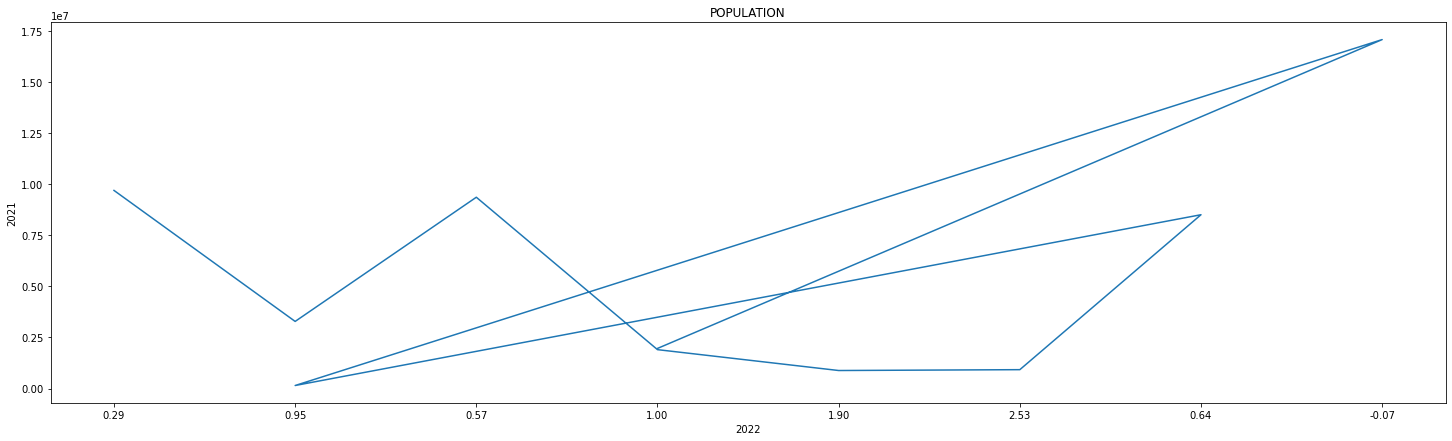

In [16]:
x = df['Growth Rate'][:10]
y = df['Area'][:10]
plt.plot(x, y)
plt.xlabel('2022')
plt.ylabel('2021')
plt.title('POPULATION')
plt.show()

C:\Users\RUSHIKESH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


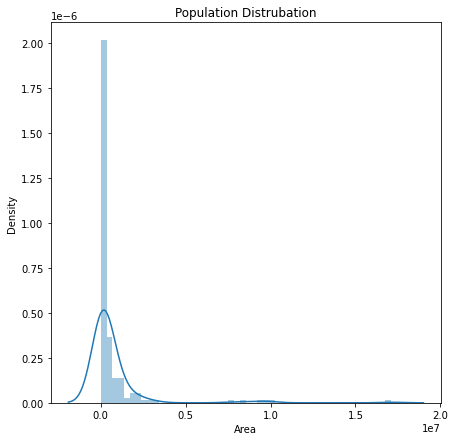

In [17]:
import seaborn as sns
pop=pd.read_csv('pop.csv')
plt.figure(figsize=(7,7))
sns.distplot(pop['Area'])
plt.title("Population Distrubation")
plt.show()

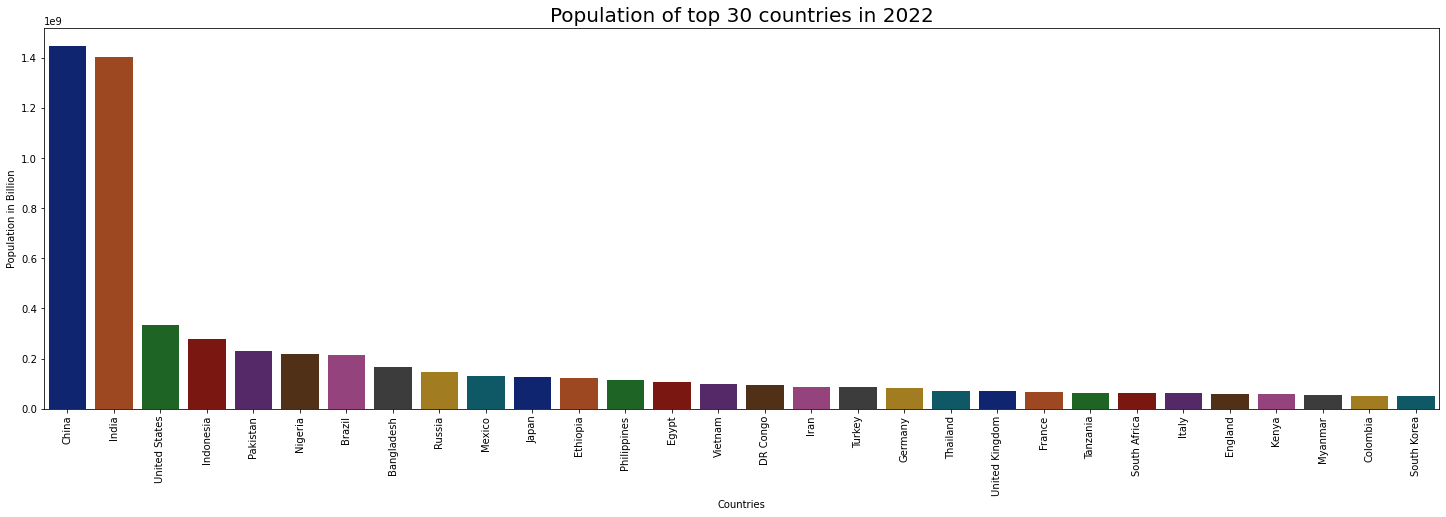

In [18]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = pop['Country'][:30], y = pop['Pop2022'][:30], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_title(label = 'Population of top 30 countries in 2022', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

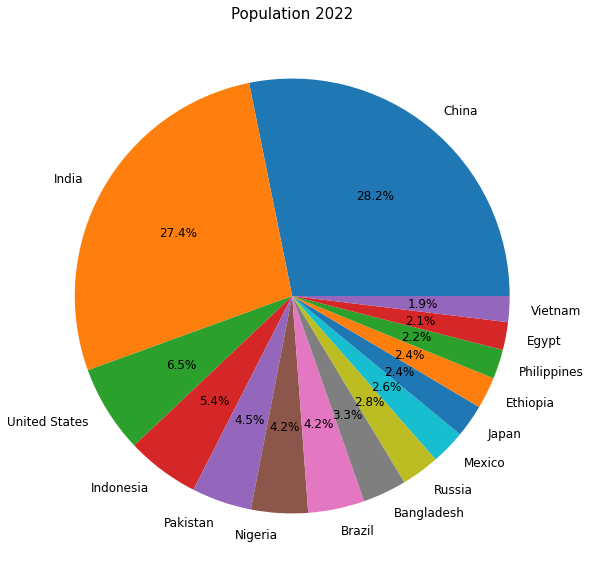

In [19]:
plt.figure(figsize=(10,10))
popc = pop['Country'][:15]
popy=pop['Pop2022'][:15]
textprops = {"fontsize":12}
plt.pie(popy, labels=popc,autopct='%.1f%%',textprops =textprops) 
plt.title('Population 2022',fontsize=15)
plt.show()